# Introduction

In [192]:
# from google.colab import drive
# drive.mount('/content/drive/MyDrive/Portfolio-Data-Science-Projects/Space-Missions-Analysis/')

<center><img src="https://i2.cdn.turner.com/cnnnext/dam/assets/210628113513-20210728-bodyinspace-exlarge-169.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [193]:
pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [194]:
pip install --upgrade plotly

### Import Statements

In [195]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [196]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [197]:
df_data = pd.read_csv('mission_launches.csv')

In [198]:
df_data.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [199]:
# Shape of the df_data
df_data.shape
print(f"How many rows and columns does it have ? It does have rows and columns {df_data.shape}")

How many rows and columns does it have ? It does have rows and columns (4324, 9)


In [200]:
print(f"What are the column names ?\nThe column names is {df_data.columns}")

What are the column names ?
The column names is Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [201]:
print(f"Are there any NaN values ? {df_data.isna().values.any()}")
print(f"Are there any duplicate values ? {df_data.duplicated().values.any()}")

Are there any NaN values ? True
Are there any duplicate values ? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [202]:
clean_df = df_data.dropna()
clean_df.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success
10,10,10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.0,Success
11,11,11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure


In [203]:
clean_df.shape

(964, 9)

In [204]:
column_clean_df = df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [205]:
column_clean_df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [206]:
column_clean_df.shape

(4324, 7)

<p> In the data cleaning, that's really hard to choose the junk value that you would drop.</p>
<ol>
    <li> First case, if you drop the Price value it's really a big loss because it has loss about 77% of your data and it's really not good to do that</li>
    <li> Second case, if you drop the columns that containt some junk values in this case ['Unnamed: 0', 'Unnamed: 0.1'] . The data has loss about 2.08% and it's little bit good for the data. And we could change the NaN value in Price columns to Zero or used a Median to convert the NaN value</li>
</ol>

In [207]:
cleaner_df = column_clean_df.fillna(0)
cleaner_df.isna().values.any()

False

In [208]:
cleaner_df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,0,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


## Descriptive Statistics

In [209]:
cleaner_df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,0,Success
freq,1777,235,2,6,3534,3360,3879


In [210]:
cleaner_df["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [211]:
cleaner_df.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [212]:
top_15_organization = cleaner_df["Organisation"].value_counts()[:15]
top_15_organization

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Name: Organisation, dtype: int64

In [213]:
bar = px.bar(x=top_15_organization.index, y=top_15_organization.values, title="Number of Launches per Company")
bar.update_layout(xaxis_title="Organization", yaxis_title="Value")
bar.show()

<p> From this Bar, we could see that one of the organization has launched rocket more than 1000 launches is RVSN USSR. And that, no other Organization has launched rocket more that 1000 launches but they launched more than 70 launches and below 300 launches
</p>

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [214]:
cleaner_df["Rocket_Status"].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [215]:
rocket_status = cleaner_df["Rocket_Status"].value_counts()
rocket_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [216]:
pie = px.pie(labels=rocket_status.index, values=rocket_status.values,
            title="Rocket Status", names=rocket_status.index)
pie.update_traces(textposition="outside", textinfo='percent+label')
pie.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<p> From the pie chart it's clear that the majority of Rocket Status is Retired with 81,7%, while the Active Status only 18,3%. The reason is because many organization used rockets as test and trial subject before they launched rocket with human.
</p>

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [217]:
mission_status = cleaner_df["Mission_Status"].value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [218]:
mission_status = cleaner_df.replace(["Partial Failure","Prelaunch Failure"],"Failure")
x = mission_status["Mission_Status"].value_counts()
x

Success    3879
Failure     445
Name: Mission_Status, dtype: int64

<p> Look at this, the majority of Mission Status is Success, and it's really diffrent from Rocket Status the majority is Retired.
</p>

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [219]:
price_launches = cleaner_df[cleaner_df["Price"]!=0]
price_launches

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [220]:
fig = px.histogram(price_launches, x="Price", nbins=20)
fig.update_layout(bargap=0.2)
fig.show()

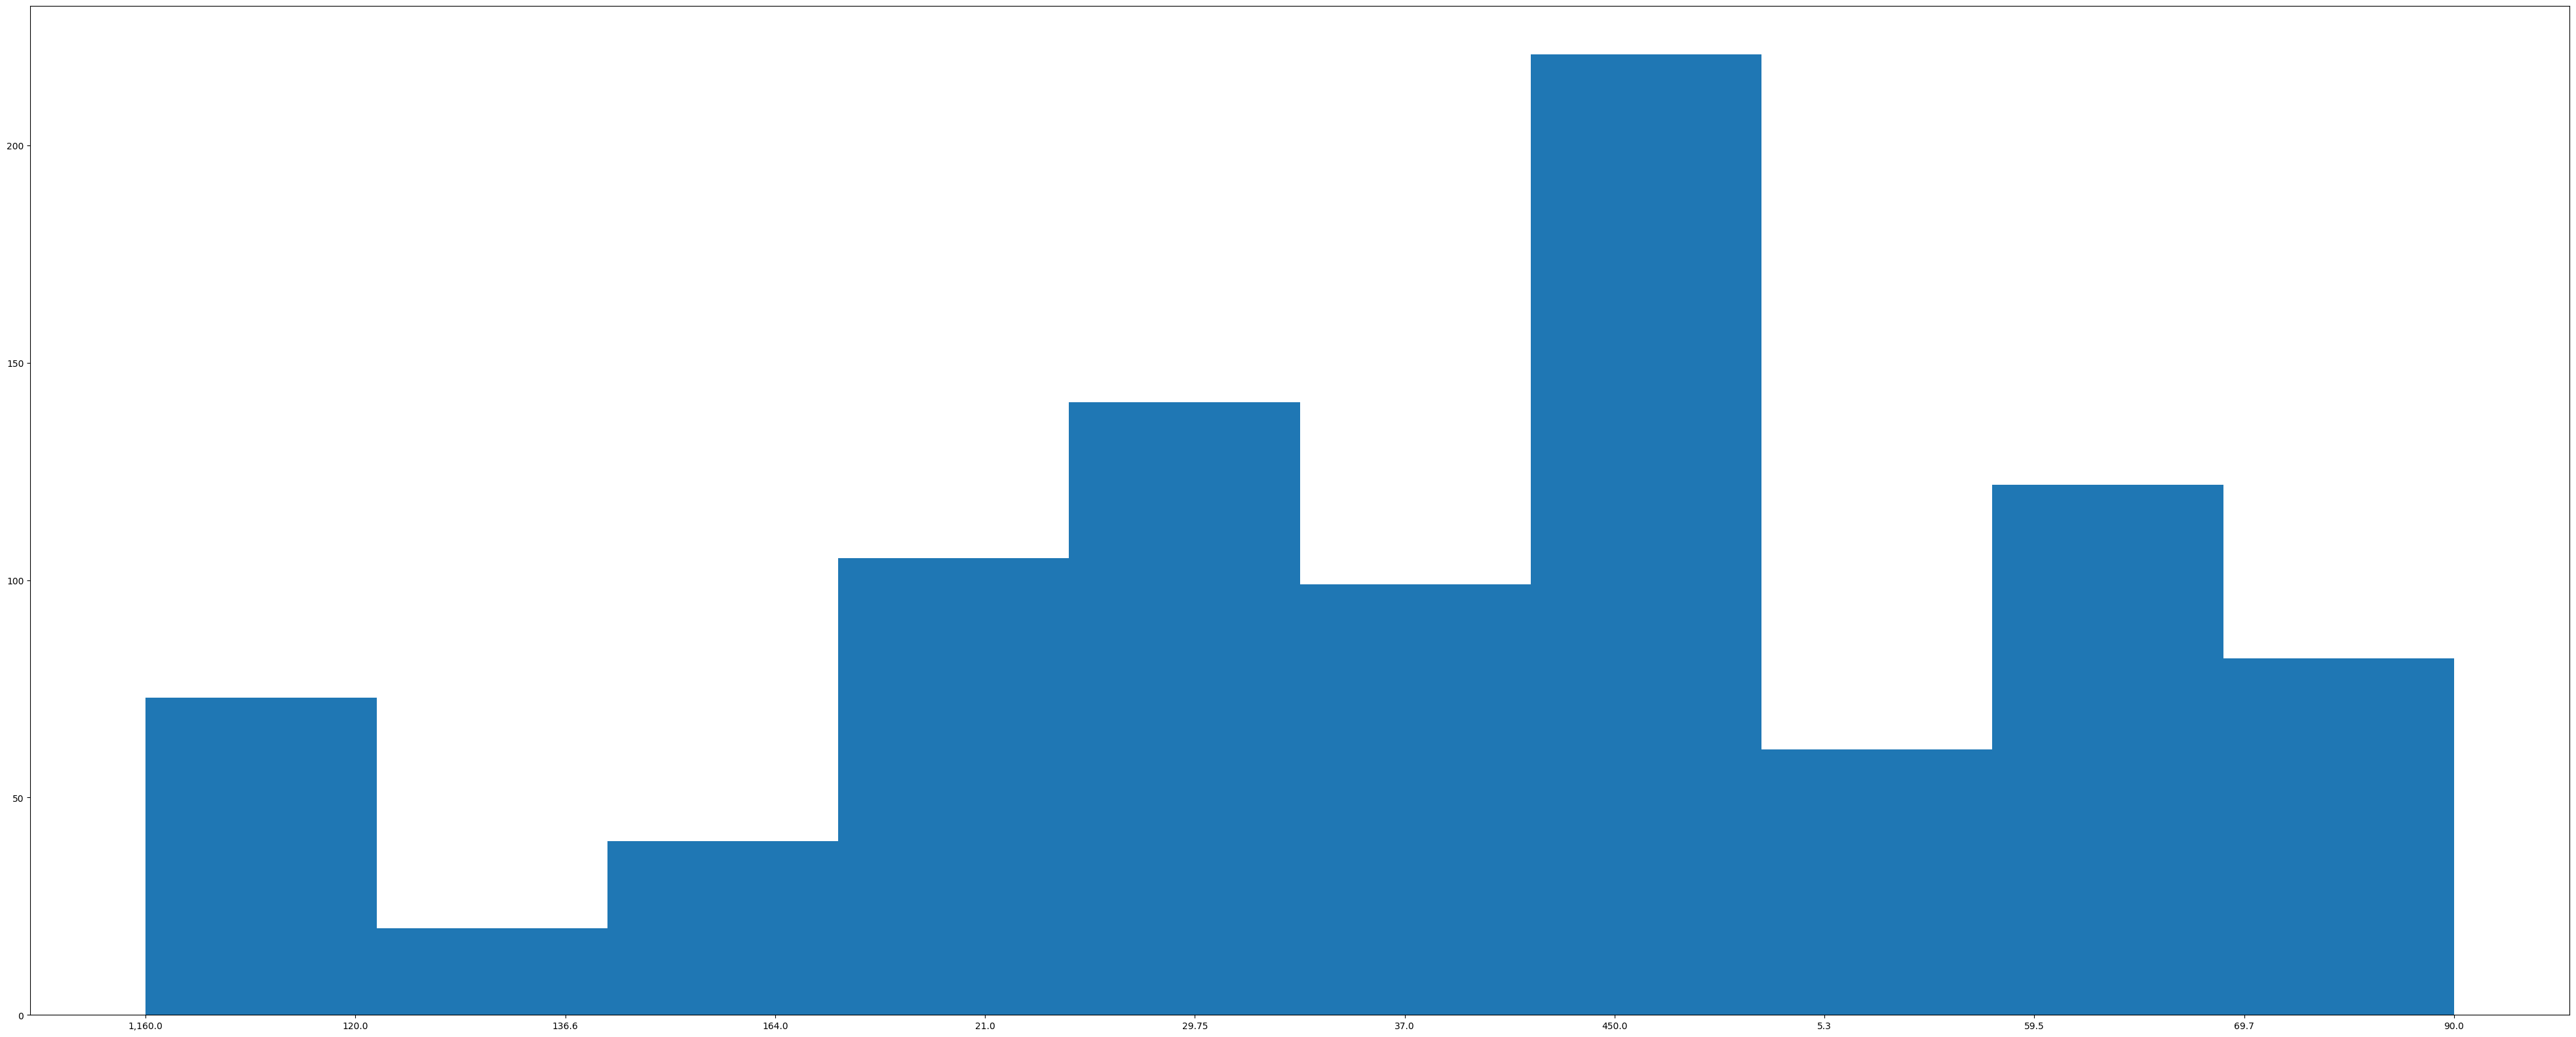

In [221]:
plt.figure(figsize=(50,20))
plt.xticks(np.arange(0, 90, step=5))
plt.hist(price_launches.sort_values("Price")["Price"], bins=10)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [222]:
cleaner_df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,0,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [223]:
cleaner_df.tail(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,0,Failure
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0,Failure
4316,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA","Wed Mar 26, 1958 17:38 UTC",Juno I | Explorer 3,StatusRetired,0,Success
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Mar 17, 1958 12:15 UTC",Vanguard | Vanguard 1,StatusRetired,0,Success
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,0,Failure
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,0,Success


In [224]:
cleaner_df.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

In [225]:
location = cleaner_df.copy()
location["Location"] = location['Location'].astype(str)
location.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

In [226]:
country_names = []
# name = []
for country in cleaner_df["Location"]:
    country_name = country.split(" ")[-1:]
#     if country_name == "Ocean":
#         print(country)
#     else:
#         print(country)
    country_names.append(country_name)


name = np.array(country_names)
# names = name.value_counts()
# print(names)
unique, counts = np.unique(name, return_counts=True)
print(dict(zip(unique, counts)))

# print(country_names)
# for name in country_names:
#     if name=="Ocean":
#         print(name)

{'Australia': 6, 'Brazil': 3, 'Canaria': 2, 'China': 268, 'Facility': 1, 'France': 303, 'India': 76, 'Iran': 13, 'Israel': 11, 'Japan': 126, 'Kazakhstan': 701, 'Kenya': 9, 'Korea': 8, 'Mexico': 4, 'Ocean': 36, 'Russia': 1395, 'Sea': 4, 'Site': 1, 'USA': 1344, 'Zealand': 13}


In [227]:
def convert_countries(locations):
    """Convert Country name used ISO 3166 to Country Code"""
    country_codes = []
    for location in locations:
        country_name = location.split(" ")[-1]
        if country_name == "Canaria":
            country_codes.append("USA")
#             country_name == "USA"
        elif country_name =="Facility":
            country_codes.append("USA")
#             country_name=="USA"
        elif country_name=="Site":
            country_codes.append("IRN")
#             country_name=="Iran"
        elif country_name=="Sea":
            if location[-2]=="Yellow":
                country_codes.append("CHN")
#                 country_name=="China"
            else:
                country_codes.append("RUS")
#                 country_name=="Russian"
        elif country_name=="Russia":
#             country_name=="Russian Federation"
              country_codes.append("RUS")
        try:
            country_code = countries.get(country_name).alpha3
            country_codes.append(country_code)
        except:
            if country_name=="Zealand":
                country_codes.append("NZL")
    #             country_name=="New Zealand" #New Zealand
            elif country_name=="Korea":
                country_codes.append("KOR")
    #             country_name=="Sourth Korea"
            elif country_name=="Iran":
                    country_codes.append("IRN")
    #             country_name=="The Islamic Republic of Iran"
            elif country_name=="Ocean":
                    country_codes.append("PIC")
#                 country_codes.append("PIC")
    #             pass
    return country_codes

print(convert_countries(cleaner_df["Location"]))

name = np.array(convert_countries(cleaner_df["Location"]))
unique, counts = np.unique(name, return_counts=True)
print(dict(zip(unique, counts)))
# names = np.unique(name)
# print(names)

['USA', 'CHN', 'USA', 'KAZ', 'USA', 'CHN', 'KAZ', 'CHN', 'USA', 'JPN', 'USA', 'CHN', 'CHN', 'ISR', 'CHN', 'NZL', 'CHN', 'USA', 'CHN', 'CHN', 'USA', 'NZL', 'CHN', 'USA', 'CHN', 'USA', 'CHN', 'USA', 'RUS', 'JPN', 'USA', 'CHN', 'CHN', 'KAZ', 'USA', 'IRN', 'CHN', 'KAZ', 'USA', 'CHN', 'KAZ', 'USA', 'RUS', 'CHN', 'CHN', 'USA', 'RUS', 'CHN', 'FRA', 'USA', 'USA', 'USA', 'IRN', 'JPN', 'KAZ', 'NZL', 'USA', 'USA', 'FRA', 'CHN', 'CHN', 'CHN', 'USA', 'CHN', 'RUS', 'KAZ', 'USA', 'CHN', 'FRA', 'USA', 'CHN', 'USA', 'IND', 'RUS', 'CHN', 'CHN', 'KAZ', 'NZL', 'USA', 'CHN', 'IND', 'FRA', 'RUS', 'CHN', 'CHN', 'CHN', 'CHN', 'USA', 'CHN', 'CHN', 'USA', 'MEX', 'CHN', 'NZL', 'USA', 'KAZ', 'CHN', 'RUS', 'KAZ', 'CHN', 'JPN', 'CHN', 'CHN', 'CHN', 'CHN', 'RUS', 'IRN', 'USA', 'KAZ', 'NZL', 'CHN', 'CHN', 'USA', 'USA', 'FRA', 'KAZ', 'KAZ', 'RUS', 'CHN', 'USA', 'CHN', 'IND', 'KAZ', 'KAZ', 'FRA', 'RUS', 'RUS', 'MEX', 'NZL', 'USA', 'CHN', 'FRA', 'USA', 'RUS', 'KAZ', 'RUS', 'USA', 'CHN', 'IND', 'CHN', 'NZL', 'USA', 'USA'

In [228]:
cleaner_df["Alpha_3"] = convert_countries(cleaner_df["Location"])
cleaner_df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha_3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,KAZ
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,0,Success,CHN
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,JPN


In [229]:
launches_by_country = cleaner_df.groupby(["Alpha_3"], as_index=False).agg({"Organisation":pd.Series.count})
launches_by_country.sort_values("Organisation", ascending=False)

# df_countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize":pd.Series.count})
# df_countries.sort_values("prize", ascending=False)

,Alpha_3,Organisation
14,RUS,1399
15,USA,1347
8,KAZ,701
3,FRA,303
2,CHN,268
7,JPN,126
4,IND,76
13,PIC,36
5,IRN,14
12,NZL,13


In [230]:
fig = px.choropleth(launches_by_country, locations="Alpha_3",
                    color="Organisation", # lifeExp is a column of gapminder
                    hover_name="Organisation", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [231]:
failure_by_country = cleaner_df[cleaner_df["Mission_Status"]=="Failure"].groupby(["Alpha_3"], as_index=False).agg(
    {"Mission_Status":pd.Series.count})
failure_by_country.rename(columns={"Mission_Status":"Failure"}, inplace=True)
failure_by_country.sort_values("Failure", ascending=False)

,Alpha_3,Failure
14,USA,128
8,KAZ,72
13,RUS,63
2,CHN,19
3,FRA,13
7,JPN,10
4,IND,8
5,IRN,8
9,KOR,5
0,AUS,3


In [232]:
fig = px.choropleth(failure_by_country, locations="Alpha_3",
                    color="Failure", # lifeExp is a column of gapminder
                    hover_name="Failure", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [233]:
countries_organization_status = cleaner_df.groupby(by=["Alpha_3","Organisation"], as_index=False).agg({"Mission_Status":pd.Series.count})
countries_organization_status.sort_values("Mission_Status", ascending=False)

,Alpha_3,Organisation,Mission_Status
44,RUS,RVSN USSR,1198
28,KAZ,RVSN USSR,579
10,FRA,Arianespace,277
54,USA,General Dynamics,251
4,CHN,CASC,250
...,...,...,...
12,FRA,CECLES,1
9,CHN,i-Space,1
8,CHN,OneSpace,1
7,CHN,Landspace,1


In [234]:
countries_organization_status

,Alpha_3,Organisation,Mission_Status
0,AUS,AMBA,1
1,AUS,CECLES,3
2,AUS,RAE,2
3,BRA,AEB,3
4,CHN,CASC,250
...,...,...,...
61,USA,SpaceX,100
62,USA,ULA,140
63,USA,US Air Force,161
64,USA,US Navy,17


In [235]:
burst = px.sunburst(countries_organization_status,
                   path=["Alpha_3","Organisation"],
                   values = "Mission_Status",
                   title="Space Mission Status of All Organization in the World"
                   )
burst.show()

In [236]:
burst = px.sunburst(cleaner_df,
                   path=["Alpha_3","Organisation","Mission_Status","Rocket_Status"],
                   title="Space Mission Status of All Organization in the World"
                   )
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [237]:
cleaner_df["Price"] = pd.to_numeric(cleaner_df["Price"], errors="coerce")
cleaner_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha_3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ


In [238]:
cost_by_organization = cleaner_df.groupby(by="Organisation", as_index=False).agg({"Price":pd.Series.sum})
cost_by_organization.sort_values("Price", ascending=False)
cost_by_organization = cost_by_organization[cost_by_organization["Price"]!=0].sort_values("Price", ascending=True)
cost_by_organization

,Organisation,Price
53,Virgin Orbit,12.00
44,Sandia,15.00
12,EER,20.00
15,ExPace,28.30
13,ESA,37.00
41,Rocket Lab,97.50
24,JAXA,168.00
31,Lockheed,280.00
14,Eurockot,543.40
28,Kosmotras,638.00


In [239]:
h_bar = px.bar(x=cost_by_organization.Organisation, y=cost_by_organization.Price, title="Space Cost by Organization")

h_bar.update_layout(xaxis_title="Price", yaxis_title="Organization")
h_bar.show()
# h_bar = px.bar(x=category_installs.Installs, y=category_installs.index,
#               orientation="h", title="Category Popularity")
# h_bar.update_layout(xaxis_title="Number of Downloads", yaxis_title="Category")
# h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [240]:
avg_cost_by_organization = cleaner_df.groupby(by="Organisation", as_index=False).agg({"Price":pd.Series.mean})
avg_cost_by_organization.sort_values("Price", ascending=False)
avg_cost_by_organization = avg_cost_by_organization[avg_cost_by_organization["Price"]!=0].sort_values("Price", ascending=True)
avg_cost_by_organization

,Organisation,Price
15,ExPace,2.83
13,ESA,2.85
31,Lockheed,3.54
34,Martin Marietta,6.33
41,Rocket Lab,7.50
52,VKS RF,7.71
6,Boeing,9.12
49,US Air Force,9.63
53,Virgin Orbit,12.00
44,Sandia,15.00


In [241]:
h_bar = px.bar(x=avg_cost_by_organization.Organisation, y=avg_cost_by_organization.Price, title="Space Cost per Launches by Organization")

h_bar.update_layout(xaxis_title="Price", yaxis_title="Organization")
h_bar.show()

# Chart the Number of Launches per Year

In [242]:
years = []
for date_time in cleaner_df.Date:
    time = date_time.split(" ")
    n_date = datetime.strptime(time[3],"%Y")
    year = n_date.year
    years.append(year)

years

[2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,

In [243]:
cleaner_df.insert(3,"Year",years)
cleaner_df.head()

,Organisation,Location,Date,Year,Detail,Rocket_Status,Price,Mission_Status,Alpha_3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [244]:
# launches_per_year = cleaner_df.groupby('Year').count()
# launches_per_year
# fig = px.bar(launches_per_year, x=launches_per_year.index, y='Mission_Status')
# fig.show()

In [245]:
launches_per_year = cleaner_df["Year"].value_counts()
launches_per_year
fig = px.bar(x=launches_per_year.index, y=launches_per_year.values)
fig.update_layout(xaxis_title="Year", yaxis_title="Total Launches")
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [246]:
# month_years = []
# for m_y in cleaner_df["Date"]:
#     dates = m_y.split(" ")[1:4]
#     d_dates=dates[1].split(",")[0]
#     dates[1]=d_dates
# #     print(dates)
#     n_dates = "-".join(dates)
# #     print(n_dates)
#     Y_m_d = datetime.strptime(n_dates,"%b-%d-%Y").month
# #     month_years.append(Y_m_d)
# # new_date = years + Y_m_d
# # print(new_date)

In [247]:
month_years = []
for m_y in cleaner_df["Date"]:
    d_arry = m_y.split(" ")
    m = datetime.strptime(d_arry[1],"%b").month
    y = datetime.strptime(d_arry[3],"%Y").year
    y_m = datetime.strptime(str(y)+"-"+str(m),"%Y-%m")
    print(y_m)
    month_years.append(y_m)

2020-08-01 00:00:00
2020-08-01 00:00:00
2020-08-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-06-01 00:00:00
2020-06-01 00:00:00
2020-06-01 00:00:00
2020-06-01 00:00:00
2020-06-01 00:00:00
2020-06-01 00:00:00
2020-06-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-05-01 00:00:00
2020-04-01 00:00:00
2020-04-01 00:00:00
2020-04-01 00:00:00
2020-04-01 00:00:00
2020-04-01 00:00:00
2020-03-01 00:00:00
2020-03-01 00:00:00
2020-03-01 00:00:00
2020-03-01 00:00:00
2020-03-01 00:00:00
2020-03-01 00:00:00
2020-03-01 00:00:00
2020-03-01 00:00:00
2020-02-01 00:00:00
2020-02-01 00:00:00
2020-02-01 00:00:00
2020-02-01 00:00:00


In [248]:
cleaner_df.insert(3,"Month_Year",month_years)
cleaner_df.head(10)

,Organisation,Location,Date,Month_Year,Year,Detail,Rocket_Status,Price,Mission_Status,Alpha_3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020-08-01,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",2020-08-01,2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020-08-01,2020,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020-07-01,2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020-07-01,2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC",2020-07-01,2020,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",2020-07-01,2020,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,KAZ
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",2020-07-01,2020,Long March 5 | Tianwen-1,StatusActive,0.00,Success,CHN
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",2020-07-01,2020,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",2020-07-01,2020,H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,JPN


In [249]:
# month_month= cleaner_df["Month_Year"].value_counts()
# month_month

In [250]:
month_month = cleaner_df.groupby(by=["Month_Year"]).count()

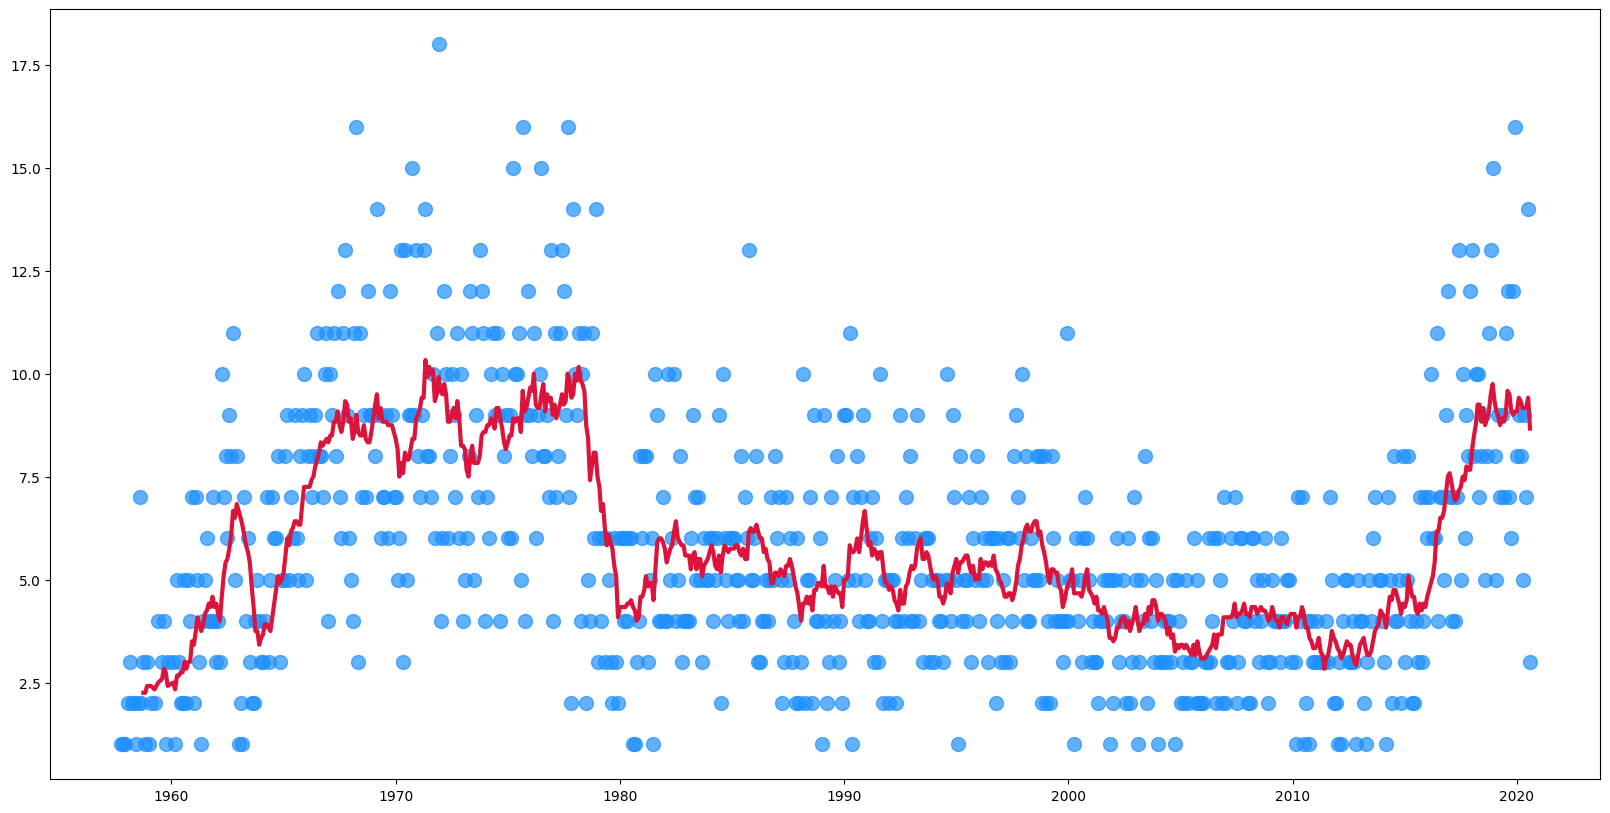

In [251]:
plt.figure(figsize=(20,10))
plt.scatter(x=month_month.index, y=month_month.Year, c="dodgerblue",
           alpha=0.7,
           s=100)
plt.plot(month_month.index,
        month_month.Year.rolling(window=12).mean(),
        c="crimson",
        linewidth=3)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [252]:
months = []
for m_y in cleaner_df["Date"]:
    d_arry = m_y.split(" ")
    m = datetime.strptime(d_arry[1],"%b").month
    months.append(m)

In [253]:
cleaner_df.insert(5,"Month",months)
cleaner_df.head(10)

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020-08-01,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",2020-08-01,2020,8,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020-08-01,2020,8,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020-07-01,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020-07-01,2020,7,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC",2020-07-01,2020,7,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",2020-07-01,2020,7,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,KAZ
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",2020-07-01,2020,7,Long March 5 | Tianwen-1,StatusActive,0.00,Success,CHN
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",2020-07-01,2020,7,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",2020-07-01,2020,7,H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,JPN


In [254]:
month= cleaner_df["Month"].value_counts()
month

12    450
6     402
4     383
10    381
8     373
9     365
3     353
7     351
2     336
11    336
5     326
1     268
Name: Month, dtype: int64

In [255]:
fig = px.bar(x=month.index, y=month.values)
fig.update_layout(xaxis_title="Month", yaxis_title="Total Launches")
fig.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [256]:
price_by_year = cleaner_df.groupby('Year').agg({'Price': pd.Series.mean})
price_by_year

,Price
Year,
1957,0.00
1958,0.00
1959,0.00
1960,0.00
1961,0.00
...,...
2016,56.50
2017,49.85
2018,48.70


In [257]:
l_chart = px.line(price_by_year,
                 x=price_by_year.index,
                 y=price_by_year.Price,
                 title="Price per Launch")

l_chart.update_layout(xaxis_title="Year",
                     yaxis_title="Price")

l_chart.show()

In [258]:
price_by_year = cleaner_df.groupby('Year').agg({'Price': pd.Series.mean})
# price_by_year
price_by_year = price_by_year[price_by_year["Price"]!=0].sort_values("Year", ascending=True)
# price_by_year

In [259]:
l_chart = px.line(price_by_year,
                 x=price_by_year.index,
                 y=price_by_year.Price,
                 title="Price per Launch")

l_chart.update_layout(xaxis_title="Year",
                     yaxis_title="Price")

l_chart.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [260]:
organization = cleaner_df["Organisation"].value_counts()[:20]
organization

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
Name: Organisation, dtype: int64

In [261]:
top_organization = ["RVSN USSR","Arianespace","CASC","General Dynamics",
                     "NASA","VKS RF","US Air Force","ULA","Boeing","Martin Marietta",
                     "SpaceX","MHI","Northrop","Lockheed","ISRO","Roscosmos","ILS",
                     "Sea Launch","ISAS","Kosmotras"]
top_20_organization = cleaner_df[cleaner_df["Organisation"].isin(top_organization)]
top_20_organization.head(20)
# print(top_20_organization.shape)

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020-08-01,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",2020-08-01,2020,8,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020-08-01,2020,8,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020-07-01,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020-07-01,2020,7,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC",2020-07-01,2020,7,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",2020-07-01,2020,7,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,KAZ
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",2020-07-01,2020,7,Long March 5 | Tianwen-1,StatusActive,0.00,Success,CHN
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",2020-07-01,2020,7,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",2020-07-01,2020,7,Minotaur IV | NROL-129,StatusActive,46.00,Success,USA


In [262]:
organisation_price_by_year = top_20_organization.groupby(["Organisation", "Year","Price"], as_index=False).count()
organisation_price_by_year = organisation_price_by_year.sort_values("Year")[["Organisation", "Year","Price"]]
organisation_price_by_year

,Organisation,Year,Price
544,RVSN USSR,1957,0.00
459,NASA,1958,0.00
716,US Air Force,1958,0.00
545,RVSN USSR,1958,0.00
195,General Dynamics,1959,0.00
...,...,...,...
191,CASC,2020,29.15
192,CASC,2020,29.75
193,CASC,2020,30.80
787,VKS RF,2020,0.00


In [263]:
# cumulative_prizes = prize_by_year.groupby(by=["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()
# cumulative_prizes.reset_index(inplace=True)

cumulative_price_per_year = organisation_price_by_year.groupby(by=["Organisation","Year"]).sum().groupby(level=[0]).cumsum()
cumulative_price_per_year.reset_index(inplace=True)


In [264]:
l_chart = px.line(cumulative_price_per_year,
                 x="Year",
                 y="Price",
                 color="Organisation",
                 hover_name="Organisation")

l_chart.update_layout(xaxis_title="Year",
                     yaxis_title="Price")

l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [265]:
new_code = []
for code in cleaner_df["Alpha_3"]:
    if code=="KAZ":
        code="RUS"
    elif code=="MEX":
        code="USA"
    new_code.append(code)

In [266]:
cleaner_df.insert(11,"New_Alpha",new_code)

In [267]:
big_country = ["RUS","USA"]
cold_war = cleaner_df.loc[cleaner_df["New_Alpha"].isin(big_country)]
cold_war = cold_war[cold_war["Year"]<=1991]
cold_war

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3,New_Alpha
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",1991-12-01,1991,12,Rokot/Briz K | GVM Demo Flight,StatusRetired,0.00,Success,KAZ,RUS
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",1991-12-01,1991,12,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,0.00,Success,RUS,RUS
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",1991-12-01,1991,12,Atlas II | Eutelsat 2F3,StatusRetired,0.00,Success,USA,USA
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",1991-11-01,1991,11,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,0.00,Success,USA,USA
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",1991-11-01,1991,11,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,0.00,Success,RUS,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",1958-02-01,1958,2,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",1958-02-01,1958,2,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",1957-12-01,1957,12,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",1957-11-01,1957,11,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ,RUS


In [268]:
cold_war_bar = cold_war["New_Alpha"].value_counts()
fig = px.bar(x=cold_war_bar.index, y=cold_war_bar.values)
fig.update_layout(xaxis_title="Country", yaxis_title="Total Launches")
fig.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [269]:
pie = px.pie(labels=cold_war_bar.index, values=cold_war_bar.values,
            title="Rocket Launches of the USSR and USA", names=cold_war_bar.index)
pie.update_traces(textposition="outside", textinfo='percent+label')
pie.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [270]:
big_country = ["RUS","USA"]
cold_war_year = cleaner_df.loc[cleaner_df["New_Alpha"].isin(big_country)]
cold_war_year

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3,New_Alpha
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020-08-01,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020-08-01,2020,8,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020-07-01,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020-07-01,2020,7,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",2020-07-01,2020,7,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,KAZ,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",1958-02-01,1958,2,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",1958-02-01,1958,2,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",1957-12-01,1957,12,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",1957-11-01,1957,11,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ,RUS


In [271]:
big_country_launches_by_year = cold_war_year.groupby(["Year","New_Alpha"], as_index=False).count()
big_country_launches_by_year = big_country_launches_by_year.sort_values("Year")[["New_Alpha", "Year"]]
big_country_launches_by_year

,New_Alpha,Year
0,RUS,1957
1,USA,1957
2,RUS,1958
3,USA,1958
4,RUS,1959
...,...,...
123,USA,2018
124,RUS,2019
125,USA,2019
126,RUS,2020


In [272]:
cold_war_by_year = cold_war_year.groupby(by=['Year','New_Alpha'])
cold_war_by_year.head(10)

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3,New_Alpha
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020-08-01,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020-08-01,2020,8,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020-07-01,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020-07-01,2020,7,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",2020-07-01,2020,7,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,KAZ,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu May 15, 1958 07:12 UTC",1958-05-01,1958,5,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,0.00,Success,KAZ,RUS
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",1958-04-01,1958,4,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0.00,Failure,KAZ,RUS
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",1957-12-01,1957,12,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",1957-11-01,1957,11,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ,RUS


In [273]:
war = big_country_launches_by_year.groupby(by=["Year"]).count().groupby(level=[0]).cumsum()
war.reset_index(inplace=True)

In [274]:
l_chart = px.line(big_country_launches_by_year,
                 x="Year",
                 y="New_Alpha",
                 color="New_Alpha",
                 hover_name="New_Alpha")

l_chart.update_layout(xaxis_title="Year",
                     yaxis_title="Price")

l_chart.show()

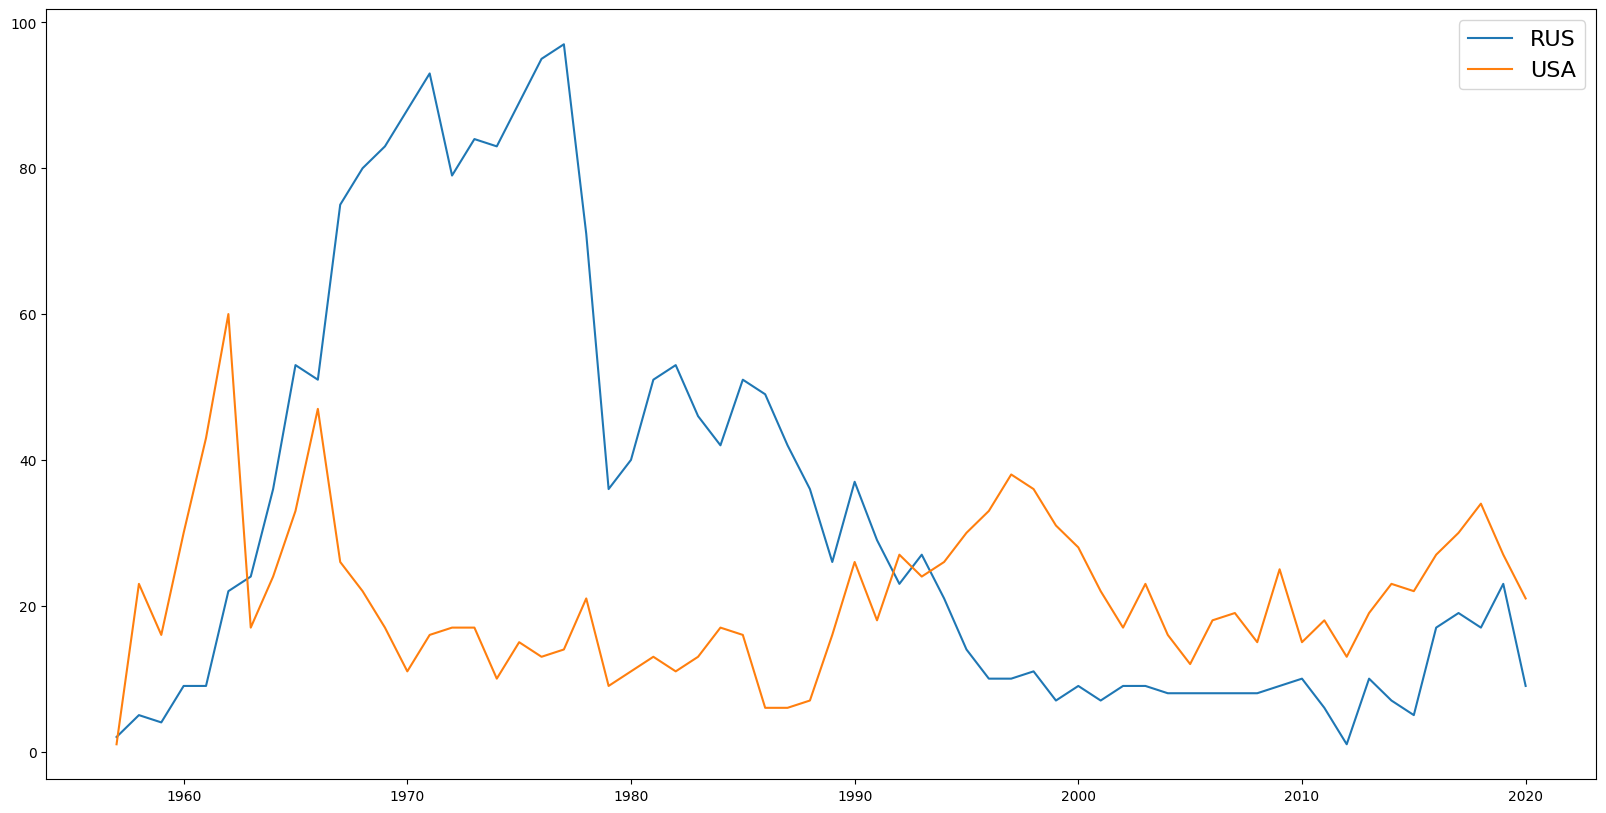

In [275]:
plt.figure(figsize=(20,10))
for country in big_country:
    war = cold_war_year[cold_war_year.New_Alpha == country]
    plt.plot(war.groupby('Year').count().index, war.groupby('Year').count().New_Alpha, label=country)
plt.legend(fontsize=16)

## Chart the Total Number of Mission Failures Year on Year.

In [276]:
cold_war_year_failure = cleaner_df[cleaner_df["Mission_Status"]=="Failure"]
cold_war_year_failure

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3,New_Alpha
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC",2020-07-01,2020,7,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,CHN,CHN
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",2020-07-01,2020,7,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,NZL,NZL
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",2020-05-01,2020,5,LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA,USA
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",2020-04-01,2020,4,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,CHN
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",2020-03-01,2020,3,Long March 7A | XJY-6,StatusActive,0.00,Failure,CHN,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",1958-04-01,1958,4,Vanguard | Vanguard TV5,StatusRetired,0.00,Failure,USA,USA
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",1958-04-01,1958,4,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0.00,Failure,KAZ,RUS
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",1958-03-01,1958,3,Juno I | Explorer 2,StatusRetired,0.00,Failure,USA,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",1958-02-01,1958,2,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,USA


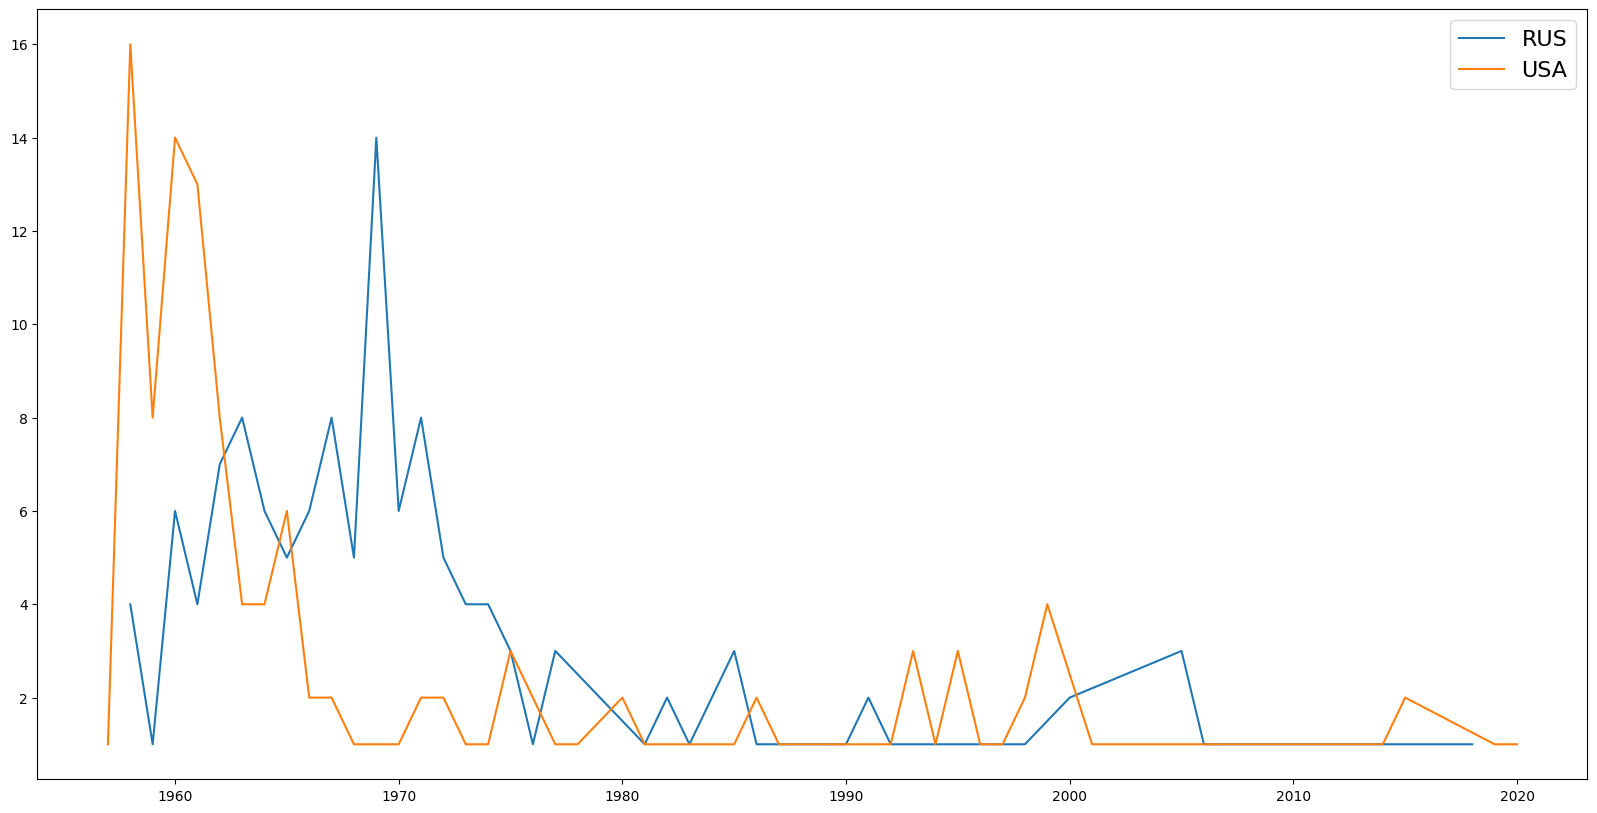

In [277]:
plt.figure(figsize=(20,10))
for country in big_country:
    failure = cold_war_year_failure[cold_war_year_failure.New_Alpha == country]
    plt.plot(failure.groupby('Year').count().index, failure.groupby('Year').count().Rocket_Status, label=country)
plt.legend(fontsize=16)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

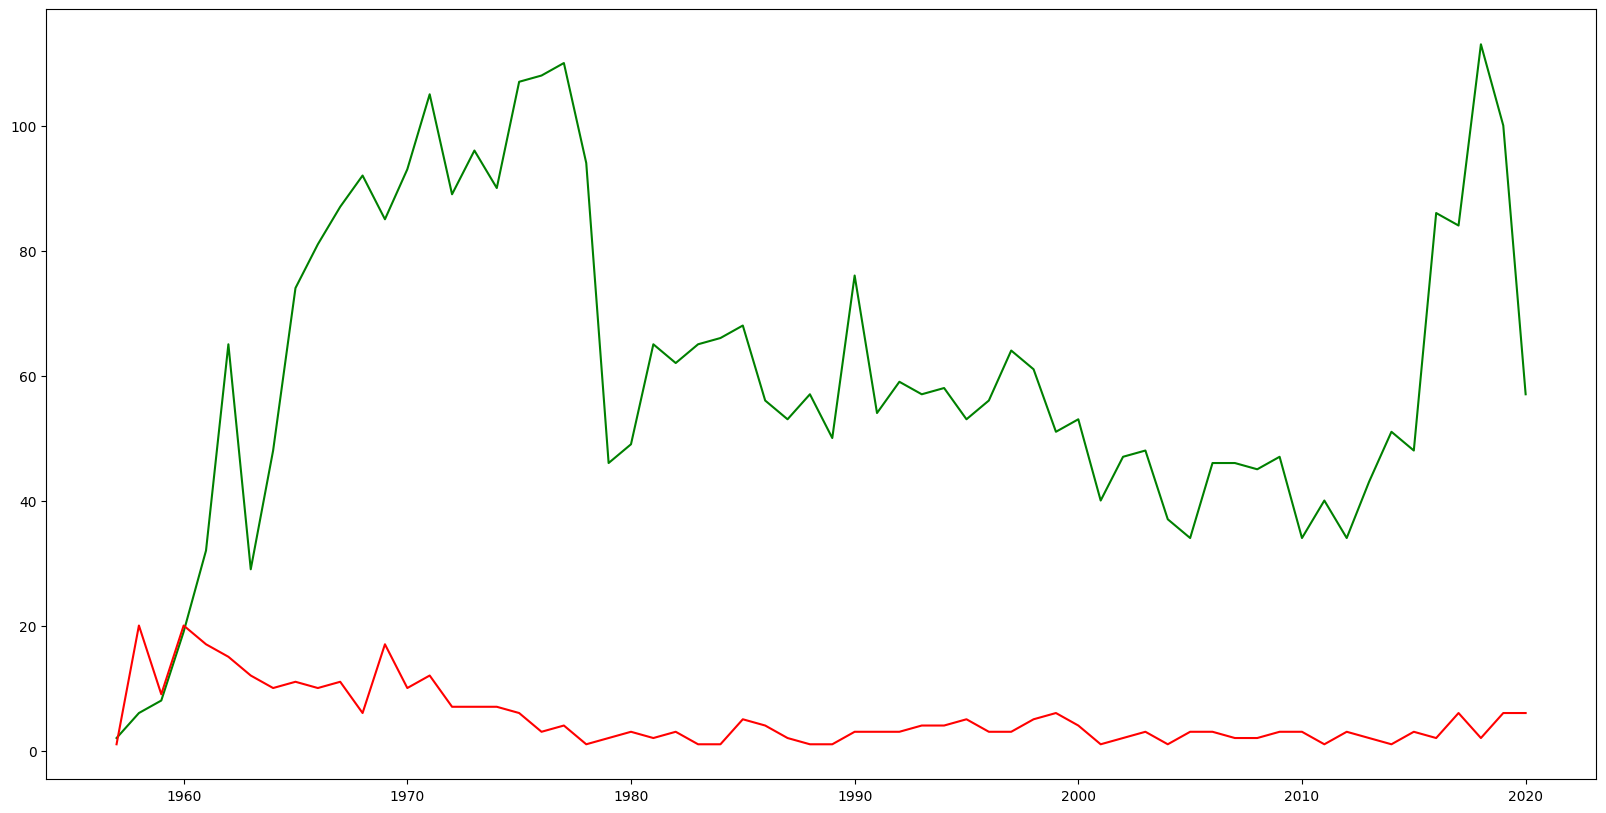

In [278]:
cold_war_year_success = cleaner_df[cleaner_df["Mission_Status"]=="Success"]
# cold_war_failure = cold_war_data.loc[cold_war_data.Mission_Status == "Failure"]
plt.figure(figsize=(20,10))
plt.plot(cold_war_year_success.groupby('Year').count().index, cold_war_year_success.groupby('Year').count()['Mission_Status'], 'g')
plt.plot(cold_war_year_failure.groupby('Year').count().index, cold_war_year_failure.groupby('Year').count()['Mission_Status'], 'r')

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [279]:
cleaner_df

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3,New_Alpha
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020-08-01,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",2020-08-01,2020,8,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020-08-01,2020,8,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020-07-01,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020-07-01,2020,7,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",1958-02-01,1958,2,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",1958-02-01,1958,2,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",1957-12-01,1957,12,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",1957-11-01,1957,11,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ,RUS


In [280]:
country_success = cleaner_df[cleaner_df["Mission_Status"]=="Success"]
country_success

,Organisation,Location,Date,Month_Year,Year,Month,Detail,Rocket_Status,Price,Mission_Status,Alpha_3,New_Alpha
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",2020-08-01,2020,8,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",2020-08-01,2020,8,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",2020-08-01,2020,8,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",2020-07-01,2020,7,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",2020-07-01,2020,7,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA","Wed Mar 26, 1958 17:38 UTC",1958-03-01,1958,3,Juno I | Explorer 3,StatusRetired,0.00,Success,USA,USA
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Mar 17, 1958 12:15 UTC",1958-03-01,1958,3,Vanguard | Vanguard 1,StatusRetired,0.00,Success,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",1958-02-01,1958,2,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",1957-11-01,1957,11,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ,RUS


In [281]:
country_success_year = country_success.groupby(["Year","Alpha_3"])["Alpha_3"]
countries_years = country_success_year.agg(["count"])
countries_years.reset_index()

,Year,Alpha_3,count
0,1957,KAZ,2
1,1958,KAZ,1
2,1958,USA,5
3,1959,KAZ,2
4,1959,USA,6
...,...,...,...
381,2020,JPN,3
382,2020,KAZ,6
383,2020,NZL,2
384,2020,RUS,3


In [282]:
test = countries_years.groupby(by=["Alpha_3","Year"]).count().groupby(level=[0]).cumsum()
test.reset_index(inplace=True)
test=test.set_index("Year")
test

,Alpha_3,count
Year,,
1967,AUS,1
1968,AUS,2
1971,AUS,3
1970,CHN,1
1971,CHN,2
...,...,...
2016,USA,59
2017,USA,60
2018,USA,61


In [283]:
fig = px.line(test, x=test.index, y="count", color='Alpha_3')
fig.update_layout(xaxis_title="Year", yaxis_title="Total Success")
fig.show()

<p>Note : For this is not a good result for me, but I thought this would be one of my learning</p>

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [284]:
organisation_launches = cleaner_df.groupby(["Organisation","Year"])["Organisation"].agg(["count"])
organisation_launches.reset_index(inplace=True)
rocket_launches = organisation_launches.set_index("Year")
rocket_launches

,Organisation,count
Year,,
1997,AEB,1
1999,AEB,1
2003,AEB,1
1958,AMBA,7
1967,AMBA,1
...,...,...
2020,VKS RF,3
2020,Virgin Orbit,1
1969,Yuzhmash,1


In [285]:
fig = px.line(rocket_launches, x=rocket_launches.index, y="count", color='Organisation')
fig.update_layout(xaxis_title="Year", yaxis_title="Total Launches")
fig.show()